In [3]:
#범주형 자료분석 : 적합도 검정
import numpy as np

x=np.array([90, 30, 35, 55, 40]) #관찰도수
e_x=np.array([0.3, 0.15, 0.1, 0.25, 0.2])*250 #기대도수

from scipy.stats import chisquare
chisq=chisquare(x, e_x)
print("Statistic=%.3f, P-value=%.3f" % chisq)

Statistic=11.400, P-value=0.022


In [5]:
#적합도 검정: 특정 분포를 따르는 가를 검정
import pandas as pd
from scipy import stats

data=pd.read_csv('ex7-2.csv')
data.head(3)

,X
0,23
1,23
2,24


KstestResult(statistic=1.0, pvalue=0.0)

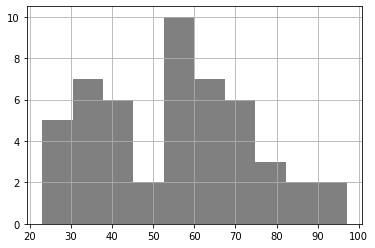

In [7]:
x=data['X']
x.hist(color='gray')
stats.kstest(x, 'norm') #방법1 : kolmogorov-smirnov

In [9]:
stats.kstest(data['X'], 'norm', args=(data['X'].mean(), data['X'].std()))

KstestResult(statistic=0.08107085426241684, pvalue=0.8711621942265746)

In [10]:
from scipy.stats import shapiro
shapiro(x)

ShapiroResult(statistic=0.9744385480880737, pvalue=0.34729865193367004)

In [15]:
#적합도 검정: cell빈도 5이하의 경우가 20% 넘는 경우 검정방법
#1) fisher-정확검정, 2) 셀 통합 후 검정
import numpy as np

level=np.array([1, 2, 3, 4, 5, 6, 7])
x=np.array([6, 3 ,18, 22, 28, 20, 3])
e_x=np.array([0.03, 0.05, 0.23, 0.30, 0.20, 0.15, 0.04])*np.sum(x)
d={'level':level, 'x':x, 'e_x':e_x}

In [16]:
from scipy.stats import chisquare
chisquare(x, e_x)

Power_divergenceResult(statistic=12.136956521739128, pvalue=0.05898229238402191)

In [17]:
#cell 통합 후 검정
level2=np.array([1, 2, 3, 4, 5, 6, 7])
x2=np.array([9,18, 22, 28, 20, 3])
e_x2=np.array([0.08, 0.23, 0.30, 0.20, 0.15, 0.04])*np.sum(x)

chisquare(x2, e_x2)

Power_divergenceResult(statistic=8.46195652173913, pvalue=0.1325471536238773)

In [19]:
# 독립성 검정
import pandas as pd
data=pd.read_csv('ex7-4.csv')
data.head()

,amount,level,count
0,10under,A,21
1,10~20,A,15
2,20~40,A,94
3,40~70,A,120
4,70upper,A,32


In [21]:
# 분할표 작성
pd.crosstab(index=data['amount'], columns=data['level'],
           values=data['count'], aggfunc=sum, margins=True, margins_name='전체')

level,A,B,C,D,전체
amount,,,,,
10under,21,42,60,5,128
10~20,15,122,45,14,196
20~40,94,100,16,30,240
40~70,120,65,20,18,223
70upper,32,9,12,20,73
전체,282,338,153,87,860


In [22]:
# 확률표, 비율표 작성
pd.crosstab(index=data['amount'], columns=data['level'],
           values=data['count'], aggfunc=sum, margins=True, margins_name='전체'
            , normalize='index').round(4)

level,A,B,C,D
amount,,,,
10under,0.1641,0.3281,0.4688,0.0391
10~20,0.0765,0.6224,0.2296,0.0714
20~40,0.3917,0.4167,0.0667,0.1250
40~70,0.5381,0.2915,0.0897,0.0807
70upper,0.4384,0.1233,0.1644,0.2740
전체,0.3279,0.3930,0.1779,0.1012


In [26]:
#카이제곱 검정 및 기대빈도표 작성
from scipy.stats import chi2_contingency
d_table=pd.crosstab(index=data['amount'], columns=data['level'],
           values=data['count'], aggfunc=sum, margins=True, margins_name='전체')
chi2_contingency(d_table)

(252.05782411526025,
 4.392425562427717e-42,
 20,
 array([[ 41.97209302,  50.30697674,  22.77209302,  12.94883721,
         128.        ],
        [ 64.26976744,  77.03255814,  34.86976744,  19.82790698,
         196.        ],
        [ 78.69767442,  94.3255814 ,  42.69767442,  24.27906977,
         240.        ],
        [ 73.12325581,  87.64418605,  39.67325581,  22.55930233,
         223.        ],
        [ 23.9372093 ,  28.69069767,  12.9872093 ,   7.38488372,
          73.        ],
        [282.        , 338.        , 153.        ,  87.        ,
         860.        ]]))

In [28]:
table=pd.crosstab(index=data['amount'], columns=data['level'],
      values=data['count'], aggfunc=sum)
chi2_contingency(table)

(252.05782411526025,
 5.092651382449468e-47,
 12,
 array([[41.97209302, 50.30697674, 22.77209302, 12.94883721],
        [64.26976744, 77.03255814, 34.86976744, 19.82790698],
        [78.69767442, 94.3255814 , 42.69767442, 24.27906977],
        [73.12325581, 87.64418605, 39.67325581, 22.55930233],
        [23.9372093 , 28.69069767, 12.9872093 ,  7.38488372]]))

In [29]:
#독립성 검정
chi, p, df, expected=chi2_contingency(table)
expected_table=pd.DataFrame(data=expected, index=table.index,
                           columns=table.columns)
expected_table

level,A,B,C,D
amount,,,,
10under,41.972093,50.306977,22.772093,12.948837
10~20,64.269767,77.032558,34.869767,19.827907
20~40,78.697674,94.325581,42.697674,24.279070
40~70,73.123256,87.644186,39.673256,22.559302
70upper,23.937209,28.690698,12.987209,7.384884


In [30]:
print("chisquare=%.3f" %chi, "P-value=%.3f" %p)

chisquare=252.058 P-value=0.000


In [36]:
data=pd.DataFrame([[21, 42, 60, 5], [15, 122, 45, 14], [94, 100, 16, 30],
                  [120, 65, 20, 18], [32, 9, 12, 20]], columns=['A', 'B', 'C', 'D']
                 , index=['10이하', '10~20', '20~40', '40~70', '70이상'])
data

,A,B,C,D
10이하,21,42,60,5
10~20,15,122,45,14
20~40,94,100,16,30
40~70,120,65,20,18
70이상,32,9,12,20


In [38]:
#동일성 검정: 분할표-pd.crosstab
import numpy as np
import pandas as pd

time=np.tile(['day', 'evening', 'night'], 2)
count=np.array([905, 890, 870, 45, 55, 70])
goods=np.repeat(['O', 'X'], 3)
data={'time':time, 'goods':goods, 'count':count}

In [42]:
d_table=pd.crosstab(index=data['goods'], columns=data['time'],
           values=data['count'], aggfunc=sum)
d_table

col_0,day,evening,night
row_0,,,
O,905,890,870
X,45,55,70


In [43]:
chi2_contingency(d_table)

(6.233920047684764,
 0.044291609404034316,
 2,
 array([[893.0335097 , 888.33333333, 883.63315697],
        [ 56.9664903 ,  56.66666667,  56.36684303]]))

In [44]:
chi, p, df, expected=chi2_contingency(d_table)
expected_d_table=pd.DataFrame(data=expected, index=d_table.index,
                           columns=d_table.columns)
expected_d_table

col_0,day,evening,night
row_0,,,
O,893.03351,888.333333,883.633157
X,56.96649,56.666667,56.366843
